In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
csv_adbe = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/ADBE_Stock.csv"
df_adbe = pd.read_csv(csv_adbe, thousands=',')

In [3]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,ADBE,264.010010,264.010010,266.239990,261.500000,265.750000,2594000
1,3/4/2019,ADBE,258.160004,258.160004,267.000000,254.080002,266.700012,2994900
2,3/5/2019,ADBE,257.380005,257.380005,259.869995,256.369995,259.000000,2101800
3,3/6/2019,ADBE,256.399994,256.399994,259.489990,253.839996,257.399994,1950500
4,3/7/2019,ADBE,255.460007,255.460007,257.489990,253.289993,255.770004,3185200


In [4]:
df_adbe.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1.324000e+03
mean,437.561171,437.561171,442.956797,431.746496,437.548852,2.987458e+06
std,112.802864,112.802864,113.786692,111.798628,112.881015,1.733830e+06
min,254.740005,254.740005,255.020004,249.100006,251.490005,5.892000e+05
25%,339.532501,339.532501,344.690010,333.492500,338.960007,2.039850e+06
50%,443.785004,443.785004,449.224991,436.915009,444.769989,2.573100e+06
75%,514.142502,514.142502,520.422485,508.869987,514.000000,3.413750e+06
max,688.369995,688.369995,699.539978,678.909973,696.280029,2.784020e+07


In [5]:
df_adbe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1324 non-null   object 
 1   Symbol     1324 non-null   object 
 2   Adj Close  1324 non-null   float64
 3   Close      1324 non-null   float64
 4   High       1324 non-null   float64
 5   Low        1324 non-null   float64
 6   Open       1324 non-null   float64
 7   Volume     1324 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 82.9+ KB


In [6]:
# Convert object to datetime64
df_adbe['Date'] = df_adbe['Date'].apply(pd.to_datetime)
# Sort data by date time value
df_adbe = df_adbe.sort_values(by="Date").reset_index(drop=True)
df_adbe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1324 non-null   datetime64[ns]
 1   Symbol     1324 non-null   object        
 2   Adj Close  1324 non-null   float64       
 3   Close      1324 non-null   float64       
 4   High       1324 non-null   float64       
 5   Low        1324 non-null   float64       
 6   Open       1324 non-null   float64       
 7   Volume     1324 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 82.9+ KB


In [7]:
df_adbe.Close

0       264.010010
1       258.160004
2       257.380005
3       256.399994
4       255.460007
           ...    
1319    478.429993
1320    477.600006
1321    445.869995
1322    444.760010
1323    439.019989
Name: Close, Length: 1324, dtype: float64

In [8]:
df_adbe['Prev_close'] = df_adbe.shift(1)['Close']
df_adbe.Prev_close

0              NaN
1       264.010010
2       258.160004
3       257.380005
4       256.399994
           ...    
1319    475.429993
1320    478.429993
1321    477.600006
1322    445.869995
1323    444.760010
Name: Prev_close, Length: 1324, dtype: float64

In [9]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close
0,2019-03-01,ADBE,264.010010,264.010010,266.239990,261.500000,265.750000,2594000,NaN
1,2019-03-04,ADBE,258.160004,258.160004,267.000000,254.080002,266.700012,2994900,264.010010
2,2019-03-05,ADBE,257.380005,257.380005,259.869995,256.369995,259.000000,2101800,258.160004
3,2019-03-06,ADBE,256.399994,256.399994,259.489990,253.839996,257.399994,1950500,257.380005
4,2019-03-07,ADBE,255.460007,255.460007,257.489990,253.289993,255.770004,3185200,256.399994


In [10]:
df_adbe['Close_change'] = df_adbe.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_close) else row.Close - row.Prev_close,
    axis = 1
)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [11]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close,Close_change
0,2019-03-01,ADBE,264.010010,264.010010,266.239990,261.500000,265.750000,2594000,NaN,0.000000
1,2019-03-04,ADBE,258.160004,258.160004,267.000000,254.080002,266.700012,2994900,264.010010,-5.850006
2,2019-03-05,ADBE,257.380005,257.380005,259.869995,256.369995,259.000000,2101800,258.160004,-0.779999
3,2019-03-06,ADBE,256.399994,256.399994,259.489990,253.839996,257.399994,1950500,257.380005,-0.980011
4,2019-03-07,ADBE,255.460007,255.460007,257.489990,253.289993,255.770004,3185200,256.399994,-0.939987


In [12]:
rows = []
for _,row in tqdm(df_adbe.iterrows(), total=df_adbe.shape[0]):
    row_data = dict(
        date = row.Date,
        open = row.Open,
        low = row.Close,
        high = row.High, 
        close = row.Close, 
        volume = row.Volume,
        close_change = row.Close_change
    )
    rows.append(row_data)
features_adbe = pd.DataFrame(rows)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [13]:
features_adbe.head()

,date,open,low,high,close,volume,close_change
0,2019-03-01,265.750000,264.010010,266.239990,264.010010,2594000,0.000000
1,2019-03-04,266.700012,258.160004,267.000000,258.160004,2994900,-5.850006
2,2019-03-05,259.000000,257.380005,259.869995,257.380005,2101800,-0.779999
3,2019-03-06,257.399994,256.399994,259.489990,256.399994,1950500,-0.980011
4,2019-03-07,255.770004,255.460007,257.489990,255.460007,3185200,-0.939987


In [14]:
def detect_outlier(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

In [15]:
detect_outlier(features_adbe, 'close')

Empty DataFrame
Columns: [date, open, low, high, close, volume, close_change]
Index: []


In [16]:
detect_outlier(features_adbe, 'volume')

           date        open         low        high       close    volume   
10   2019-03-15  258.029999  257.089996  260.000000  257.089996  12110500  \
40   2019-04-29  286.459992  286.140015  291.709992  286.140015   5592400   
76   2019-06-19  287.000000  291.209992  292.000000  291.209992   9738600   
77   2019-06-20  293.250000  302.109985  302.660004  302.109985   5632500   
139  2019-09-18  275.350006  279.720001  280.290008  279.720001   7449700   
...         ...         ...         ...         ...         ...       ...   
1270 2024-03-18  495.549988  513.859985  515.729981  513.859985   7052700   
1271 2024-03-19  509.890015  521.190002  522.679993  521.190002   7081800   
1288 2024-04-12  477.950012  474.089996  478.779999  474.089996   5620000   
1321 2024-05-30  464.899994  445.869995  466.820007  445.869995   5606900   
1322 2024-05-31  447.720001  444.760010  448.230011  444.760010   7487500   

      close_change  
10      -10.600006  
40        4.180023  
76       14.

In [17]:
detect_outlier(features_adbe, 'close_change')

           date        open         low        high       close    volume   
257  2020-03-09  311.679993  305.790008  322.440002  305.790008   5291900  \
258  2020-03-10  318.980011  332.380005  332.940002  332.380005   5973700   
260  2020-03-12  290.410004  285.000000  310.130005  285.000000   7230200   
261  2020-03-13  312.880005  335.500000  336.000000  335.500000   8935200   
262  2020-03-16  288.359985  286.029999  307.109985  286.029999   7140100   
...         ...         ...         ...         ...         ...       ...   
1250 2024-02-16  589.900024  546.659973  590.140015  546.659973  10323000   
1261 2024-03-05  562.599976  544.840027  564.190002  544.840027   4286800   
1269 2024-03-15  499.640015  492.459992  503.130005  492.459992  19570500   
1270 2024-03-18  495.549988  513.859985  515.729981  513.859985   7052700   
1321 2024-05-30  464.899994  445.869995  466.820007  445.869995   5606900   

      close_change  
257     -30.979981  
258      26.589996  
260     -30.

In [18]:
features_adbe = features_adbe.set_index("date")
features_adbe.head()

,open,low,high,close,volume,close_change
date,,,,,,
2019-03-01,265.750000,264.010010,266.239990,264.010010,2594000,0.000000
2019-03-04,266.700012,258.160004,267.000000,258.160004,2994900,-5.850006
2019-03-05,259.000000,257.380005,259.869995,257.380005,2101800,-0.779999
2019-03-06,257.399994,256.399994,259.489990,256.399994,1950500,-0.980011
2019-03-07,255.770004,255.460007,257.489990,255.460007,3185200,-0.939987


In [19]:
train_size = int(0.8 * len(features_adbe))
test_size = len(features_adbe)-train_size

train_adbe_df = features_adbe[:train_size]
test_adbe_df = features_adbe[train_size:]

Text(0.5, 1.0, 'Time Series Plots of adbe stock')

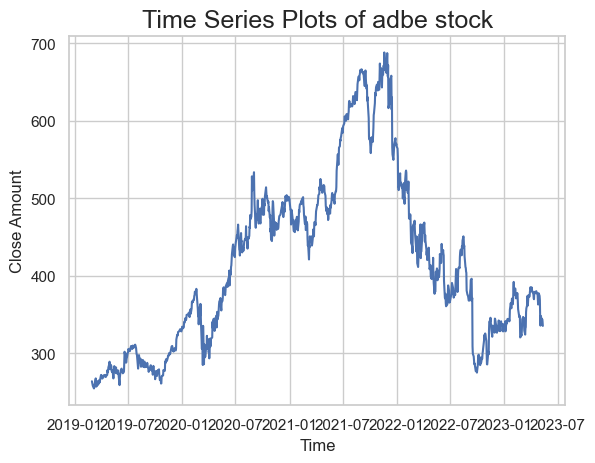

In [20]:
fig, ax = plt.subplots()
ax.plot(train_adbe_df.index, train_adbe_df['close'])
ax.set_ylabel('Close Amount')
ax.set_xlabel('Time')
ax.set_title('Time Series Plots of adbe stock', size=18)

The additive method is useful when the trend and seasonal variation is relatively constant over time as shown below whereas the multiplicative method is useful when the trend and seasonal variation increases or decreases in magnitude over time

Text(0.5, 0, 'Y')

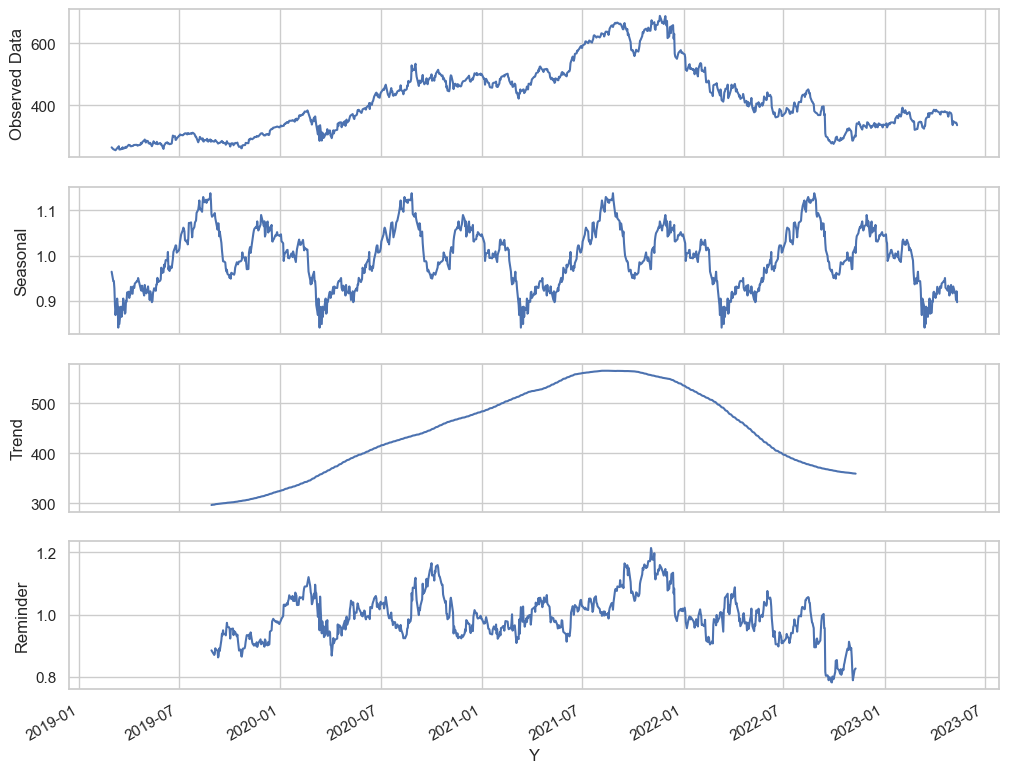

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(train_adbe_df['close'], model='multiplicative', period=252)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10), sharex= True)
res.observed.plot(ax=ax1)
ax1.set_ylabel('Observed Data')
res.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonal')
res.trend.plot(ax=ax3)
ax3.set_ylabel('Trend')
res.resid.plot(ax=ax4)
ax4.set_ylabel('Reminder')

plt.xlabel("Y")

In [22]:
# Define your parameter grid
param_grid = {
    'error': ['add', 'mul'],
    'trend': ['add', None],
    'damped_trend': [False, True],
    'seasonal': ['add', None, 'mul'],
    'seasonal_periods': [14, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 365]
}

# Initialize variables to store the best score, parameters, and model
best_aic = float('inf')
best_params = None
best_model = None

# Ensure the data passed to ETSModel is 1-dimensional and has date index with frequency
train_series = pd.Series(train_adbe_df['close'].values, index=pd.date_range(start=train_adbe_df.index[0], periods=len(train_adbe_df), freq='D'))
test_series = pd.Series(test_adbe_df['close'].values, index=pd.date_range(start=test_adbe_df.index[0], periods=len(test_adbe_df), freq='D'))

# Iterate over all combinations of parameters
for error in param_grid['error']:
    for trend in param_grid['trend']:
        damped_trend_values = [False] if trend is None else param_grid['damped_trend']
        for damped_trend in damped_trend_values:
            for seasonal in param_grid['seasonal']:
                for seasonal_periods in param_grid['seasonal_periods']:
                    try:
                        # Skip the excluded cases
                        if (error == 'add' and trend is None and seasonal == 'mul') or \
                           (error == 'add' and trend == 'add' and seasonal == 'mul') or \
                           (error == 'add' and damped_trend and seasonal == 'mul'):
                            continue
                        # Check if seasonal_periods is valid with the given seasonal component
                        if seasonal is None and seasonal_periods is not None:
                            continue
                        
                        # Define and fit the model
                        model = ETSModel(train_series, 
                                         error=error,
                                         trend=trend,
                                         damped_trend=damped_trend, 
                                         seasonal=seasonal, 
                                         seasonal_periods=seasonal_periods,
                                         initialization_method='heuristic')
                        model_fit = model.fit()

                        # Make predictions with date index preserved
                        # Get AIC score
                        aic_score = model_fit.aic
                        
                        # Update the best model if the current one has lower AIC
                        if aic_score < best_aic:
                            best_aic = aic_score
                            best_params = {
                                'error': error,
                                'trend': trend,
                                'damped_trend': damped_trend,
                                'seasonal': seasonal,
                                'seasonal_periods': seasonal_periods
                            }
                            best_model = model_fit

                    except Exception as e:
                        print(f"An error occurred for parameters (error={error}, trend={trend}, damped_trend={damped_trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods}): {e}")
                        continue

# Output the best model's AIC
if best_model is not None:
    print('Best model')
    print(f"Best Parameters: {best_params}")
    print(f"Best AIC: {best_aic}")

Best model
Best Parameters: {'error': 'mul', 'trend': None, 'damped_trend': False, 'seasonal': 'mul', 'seasonal_periods': 210}
Best AIC: 7666.372630750945


In [23]:
# Quá trình testing
# Forecast the values for the test set
test_predictions = best_model.predict(start=len(train_adbe_df), end=len(train_adbe_df) + len(test_adbe_df) - 1 )
test_dates = pd.Series(test_adbe_df.index)  # Adjust freq as per your data
y_pred = test_predictions
test_predictions.index = test_dates
# Output the forecasted values for the test set
print("Test Set Predictions:")
print(test_predictions)

Test Set Predictions:
date
2023-05-15    331.976547
2023-05-16    335.789287
2023-05-17    335.640513
2023-05-18    340.554439
2023-05-19    341.563342
                 ...    
2024-05-28    306.218971
2024-05-29    307.479902
2024-05-30    301.544714
2024-05-31    305.184207
2024-06-03    306.858439
Length: 265, dtype: float64


In [24]:
#Evaluating algorithm accuracy using
y_test = test_adbe_df['close']
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
print('Testing MAE:', test_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)

Testing RMSE: 216.75464829023463
Testing MAE: 205.82333953761966
Testing MAPE: 0.37871996128884455


In [25]:
#Predict the closing prices for the next 30 days
forecast_horizon = 30
forecast_dates = pd.date_range(start=features_adbe.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
forecast_30_days = best_model.predict(start=len(features_adbe), end=len(features_adbe) + forecast_horizon - 1)
forecast_30_days.index = forecast_dates
print(forecast_30_days)

2024-06-04    301.680538
2024-06-05    305.161686
2024-06-06    306.592831
2024-06-07    305.940811
2024-06-08    305.122325
2024-06-09    308.988083
2024-06-10    309.419646
2024-06-11    306.075987
2024-06-12    314.490457
2024-06-13    315.525166
2024-06-14    310.242675
2024-06-15    312.278090
2024-06-16    302.402862
2024-06-17    297.585041
2024-06-18    296.817128
2024-06-19    298.554889
2024-06-20    304.938791
2024-06-21    305.509022
2024-06-22    302.778761
2024-06-23    305.977424
2024-06-24    307.947031
2024-06-25    301.446636
2024-06-26    299.891041
2024-06-27    297.803186
2024-06-28    290.882995
2024-06-29    288.624822
2024-06-30    291.448799
2024-07-01    294.517965
2024-07-02    293.568033
2024-07-03    300.366255
Freq: D, dtype: float64


In [26]:
#Predict the closing prices for the next 60 days
forecast_horizon = 60
forecast_dates = pd.date_range(start=features_adbe.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
forecast_60_days = best_model.predict(start=len(features_adbe), end=len(features_adbe) + forecast_horizon - 1)
forecast_60_days.index = forecast_dates
print(forecast_60_days)

2024-06-04    301.680538
2024-06-05    305.161686
2024-06-06    306.592831
2024-06-07    305.940811
2024-06-08    305.122325
2024-06-09    308.988083
2024-06-10    309.419646
2024-06-11    306.075987
2024-06-12    314.490457
2024-06-13    315.525166
2024-06-14    310.242675
2024-06-15    312.278090
2024-06-16    302.402862
2024-06-17    297.585041
2024-06-18    296.817128
2024-06-19    298.554889
2024-06-20    304.938791
2024-06-21    305.509022
2024-06-22    302.778761
2024-06-23    305.977424
2024-06-24    307.947031
2024-06-25    301.446636
2024-06-26    299.891041
2024-06-27    297.803186
2024-06-28    290.882995
2024-06-29    288.624822
2024-06-30    291.448799
2024-07-01    294.517965
2024-07-02    293.568033
2024-07-03    300.366255
2024-07-04    303.029864
2024-07-05    302.540071
2024-07-06    302.966873
2024-07-07    301.295833
2024-07-08    305.637789
2024-07-09    304.035226
2024-07-10    299.407515
2024-07-11    302.700374
2024-07-12    303.728196
2024-07-13    304.013044


In [27]:
#Predict the closing prices for the next 90 days
forecast_horizon = 90
forecast_dates = pd.date_range(start=features_adbe.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
forecast_90_days = best_model.predict(start=len(features_adbe), end=len(features_adbe) + forecast_horizon - 1)
forecast_90_days.index = forecast_dates
print(forecast_90_days)

2024-06-04    301.680538
2024-06-05    305.161686
2024-06-06    306.592831
2024-06-07    305.940811
2024-06-08    305.122325
                 ...    
2024-08-28    306.605292
2024-08-29    311.339731
2024-08-30    311.936481
2024-08-31    312.084847
2024-09-01    309.898219
Freq: D, Length: 90, dtype: float64


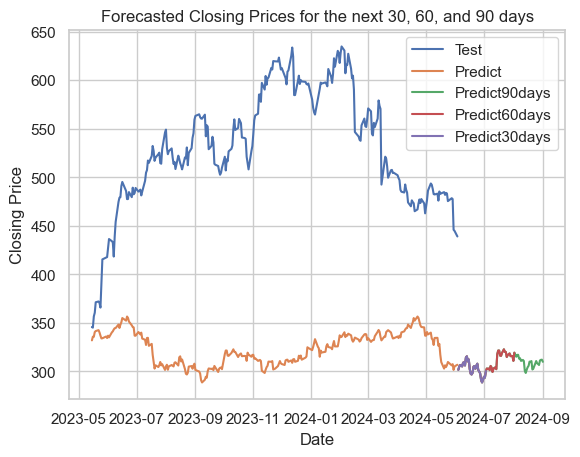

In [28]:
#Vẽ hình
plt.plot(test_adbe_df['close'])
plt.plot(test_predictions)
plt.plot(forecast_90_days)
plt.plot(forecast_60_days)
plt.plot(forecast_30_days)
plt.legend(['Test','Predict','Predict90days', 'Predict60days', 'Predict30days'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Forecasted Closing Prices for the next 30, 60, and 90 days')
plt.grid(True)
plt.show()